# X-Ray Classification

### Importing Packages

In [2]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
path = r"C:\Users\Anisha Ray\Downloads\archive (5)"

In [8]:
# Use ImageDataGenerator to rescale the images
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [13]:
# Load the images
train_generator = train_datagen.flow_from_directory(directory=path +'\\train', 
                                                    target_size=(224, 224),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)
test_generator = test_datagen.flow_from_directory(directory=path +'\\test',
                                                  target_size=(224, 224),
                                                  color_mode="grayscale",
                                                  batch_size=1,
                                                  class_mode=None,
                                                  shuffle=False,
                                                  seed=42)
valid_generator = valid_datagen.flow_from_directory(directory=path +'\\val', 
                                                    target_size=(224, 224),
                                                    color_mode="grayscale",
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,seed=42)


Found 6326 images belonging to 4 classes.
Found 771 images belonging to 4 classes.
Found 38 images belonging to 4 classes.


### Creating the model

In [14]:
model= Sequential()

model.add(Conv2D(filters=128,strides= 1, kernel_size = (5,5), activation='relu', input_shape=(224,224,1,)))
model.add(MaxPool2D(3,3))
model.add(Conv2D(filters=64,kernel_size = (5,5),activation='relu'))
model.add(MaxPool2D(3,3))

model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(2048,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(256,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(.1))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation = 'softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer ='adam', metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 128)     3328      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 64)        204864    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 30)        17310     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 30)       0

### Training the Model

In [15]:
# Hyperparameters
STEP_SIZE_TRAIN = train_generator.n//train_generator.batch_size
STEP_SIZE_VALID = valid_generator.n//valid_generator.batch_size
# Stop the training when there is no improvement after 3 epochs trainings.
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(train_generator,steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=valid_generator,verbose= 1,
          validation_steps=STEP_SIZE_VALID,
          epochs=15, callbacks=early_stop)

Epoch 1/15
197/197 [==============================] - 720s 4s/step - loss: 0.7598 - accuracy: 0.6964 - val_loss: 0.7823 - val_accuracy: 0.5625
Epoch 2/15
197/197 [==============================] - 743s 4s/step - loss: 0.3424 - accuracy: 0.8594 - val_loss: 0.6314 - val_accuracy: 0.8125
Epoch 3/15
197/197 [==============================] - 809s 4s/step - loss: 0.2698 - accuracy: 0.9004 - val_loss: 0.7945 - val_accuracy: 0.7500
Epoch 4/15
197/197 [==============================] - 764s 4s/step - loss: 0.1991 - accuracy: 0.9256 - val_loss: 0.3599 - val_accuracy: 0.8438
Epoch 5/15
197/197 [==============================] - 795s 4s/step - loss: 0.1597 - accuracy: 0.9434 - val_loss: 0.5184 - val_accuracy: 0.7812
Epoch 6/15
197/197 [==============================] - 749s 4s/step - loss: 0.1393 - accuracy: 0.9506 - val_loss: 0.5436 - val_accuracy: 0.8125
Epoch 7/15
197/197 [==============================] - 639s 3s/step - loss: 0.1171 - accuracy: 0.9584 - val_loss: 0.4394 - val_accuracy: 0.7812

### Model Evaluation

In [16]:
# Evaluate the model
model.evaluate(valid_generator,steps=STEP_SIZE_VALID)
# Save the model
model.save("KerasModel")

1/1 [==============================] - 2s 2s/step - loss: 0.3782 - accuracy: 0.8125


INFO:tensorflow:Assets written to: KerasModel\assets


INFO:tensorflow:Assets written to: KerasModel\assets


### Model Evaluation

In [26]:
# Predict Output
STEP_SIZE_TEST = test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

predicted_class_indices=np.argmax(pred,axis=1)

labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

771/771 [==============================] - 34s 44ms/step


In [33]:
current_idx = 0
count_accurate= 0
Actual = []
for i in predictions:
    string = test_generator.filenames[current_idx]
    substr = '/'
    actual = string[:string.find(substr)]
    Actual.append(actual)
    pred = predictions[current_idx]
    if actual == pred: 
        count_accurate =+ 1
    current_idx =+1
acc = count_accurate/771

In [19]:
print(classification_report(Actual, predictions))

                                      precision    recall  f1-score   support

                             COVID19       0.00      0.00      0.00       0.0
             COVID19\COVID19(460).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(461).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(462).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(463).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(464).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(465).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(466).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(467).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(468).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(469).jp       0.00      0.00      0.00       1.0
             COVID19\COVID19(470).jp       0.00      0.00      

C:\Users\Anisha Ray\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anisha Ray\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anisha Ray\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Anisha Ray\anaconda3\lib\site-packages\

### Data Visualization

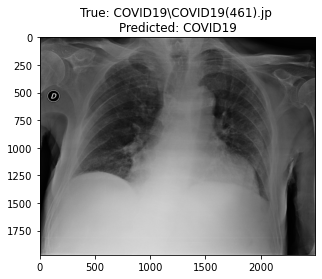

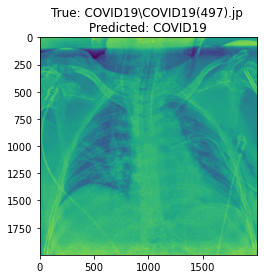

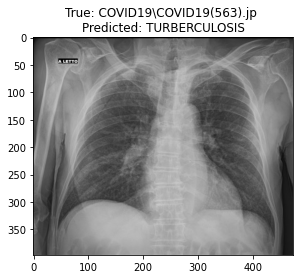

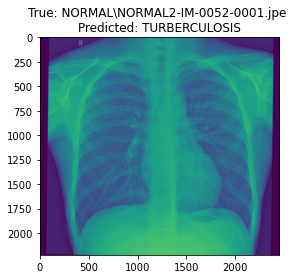

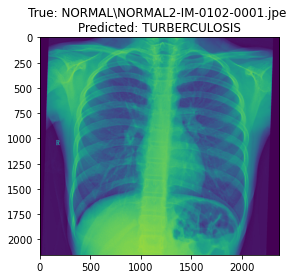

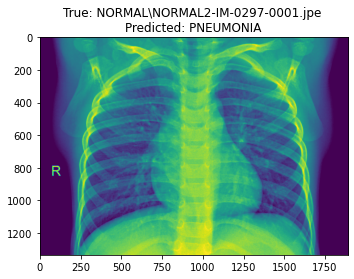

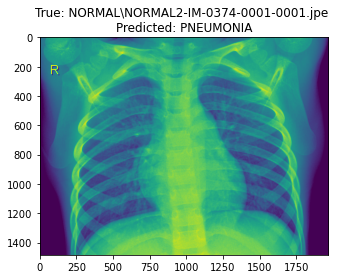

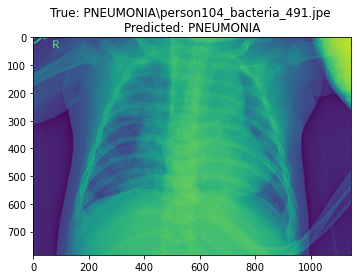

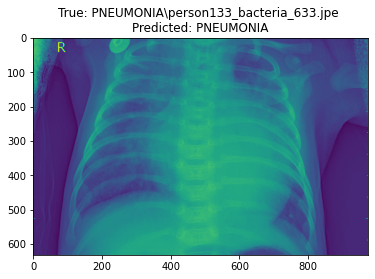

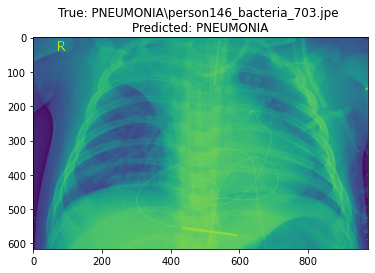

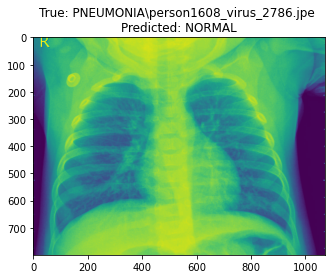

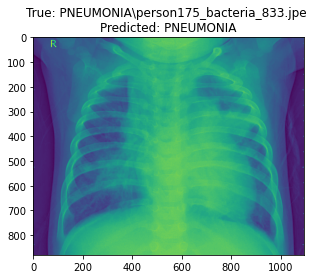

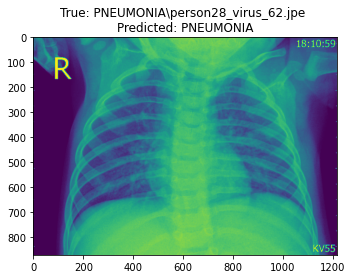

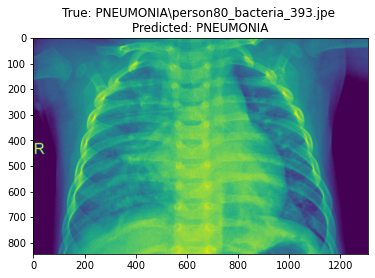

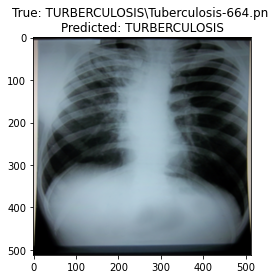

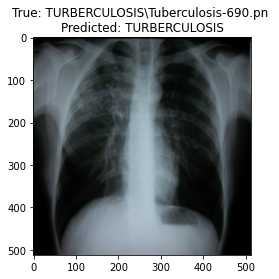

In [22]:
current = [1,37,103,189,203,274,333,355,435,478,511,587,609,678,734,760]
for i in current: 
    plt.imshow(plt.imread(path+'\\test\\'+test_generator.filenames[i]))
    string = test_generator.filenames[i]
    substr = '/'
    actual = string[:string.find(substr)]
    plt.title(f"True: {actual} \nPredicted: {predictions[i]}")
    plt.show()